In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

import mesh
import geometry
import material
import cross_section
import beam_element

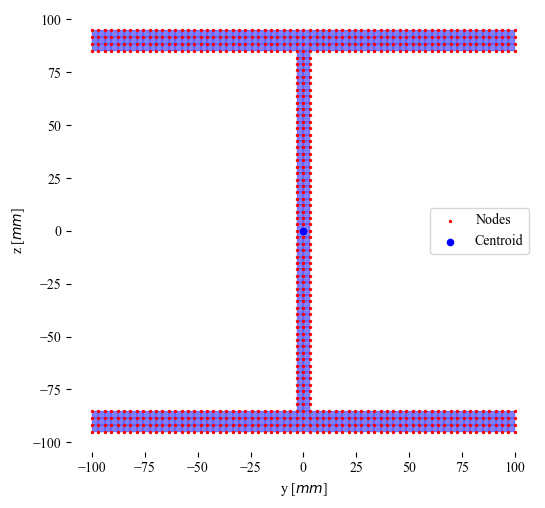

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 508           │
├────────────────────┼───────────────┤
│ Number of nodes    │ 701           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 5105.00       │
╘════════════════════╧═══════════════╛
╒═══════════════════╤═════════════╤═════════════╕
│                   │           y │           z │
╞═══════════════════╪═════════════╪═════════════╡
│ Centroid          │       -0.00 │        0.00 │
├───────────────────┼─────────────┼─────────────┤
│ Moment of inertia │ 35094541.67 │ 13337223.85 │
╘═══════════════════╧═════════════╧═════════════╛


In [2]:
H    = geometry.H_beam(web_width     =   6.5,
                       web_height    = 170.0,
                       flange_width  = 200.0,
                       flange_height =  10.0)
Mesh = mesh.Mesh(H, "quadrilateral", 3)

Mesh.plot()
Mesh.print()

In [3]:
nodes = np.array([[0.0,0.0,0.0],[0.0,1000.0,0.0]])
beam = beam_element.Beam_Element(Mesh, 3, nodes, [0,1,2,3,4,5])
K = beam.get_local_stiffness_matrix()

In [4]:
import pandas as pd
def print_nodal_displacements_and_forces(u, F_int):
    # Define labels for the DOFs
    dof_labels = [
        'u1 [mm]', 'v1 [mm]', 'w1 [mm]', 'θx1 [rad]', 'θy1 [rad]', 'θz1 [rad]',
        'u2 [mm]', 'v2 [mm]', 'w2 [mm]', 'θx2 [rad]', 'θy2 [rad]', 'θz2 [rad]'
    ]
    F_int_labels = [
		'Fx1 [kN]', 'Fy1 [kN]', 'Fz1 [kN]', 'Mx1 [kNm]', 'My1 [kNm]', 'Mz1 [kNm]',
		'Fx2 [kN]', 'Fy2 [kN]', 'Fz2 [kN]', 'Mx2 [kNm]', 'My2 [kNm]', 'Mz2 [kNm]'
	]

    F_int[[0,1,2,6,7,8]] = F_int[[0,1,2,6,7,8]] / 1000.0 # Convert to kN
    F_int[[3,4,5,9,10,11]] = F_int[[3,4,5,9,10,11]] / 1000000.0 # Convert to kNm
    # Create a DataFrame
    df1 = pd.DataFrame({
        'Displacement': u
    }, index=dof_labels)
    df2 = pd.DataFrame({
        'Internal Force': F_int
    }, index=F_int_labels)

    # Format nicely
    pd.set_option('display.precision', 6)
    pd.set_option('display.float_format', '{:,.3f}'.format)
    print(df1)
    print(df2)

In [5]:
k_global = beam.get_global_stiffness_matrix()
F = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100000.0, 0.0, 0.0, 0.0])

fixed_dofs = [0,1,2,3,4,5]

for dof in fixed_dofs:
    k_global[dof,:] = 0
    k_global[:,dof] = 0
    k_global[dof,dof] = 1.0
    F[dof] = 0.0
	
u = np.linalg.solve(k_global, F)

k_global = beam.get_global_stiffness_matrix()
F_int = np.dot(k_global, u)

print_nodal_displacements_and_forces(u, F_int)

           Displacement
u1 [mm]           0.000
v1 [mm]           0.000
w1 [mm]           0.000
θx1 [rad]         0.000
θy1 [rad]         0.000
θz1 [rad]         0.000
u2 [mm]           0.000
v2 [mm]           0.000
w2 [mm]          -4.524
θx2 [rad]        -0.007
θy2 [rad]         0.000
θz2 [rad]        -0.000
           Internal Force
Fx1 [kN]           -0.000
Fy1 [kN]            0.000
Fz1 [kN]          100.000
Mx1 [kNm]         100.000
My1 [kNm]           0.000
Mz1 [kNm]           0.000
Fx2 [kN]            0.000
Fy2 [kN]           -0.000
Fz2 [kN]         -100.000
Mx2 [kNm]           0.000
My2 [kNm]           0.000
Mz2 [kNm]           0.000
